In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

**Завдання 1.** Обчислення власних значень та власних векторів матриці 

In [8]:
A = np.array([[1, 2], [2, 3]])
eig_values, eig_vectors = np.linalg.eig(A)

print(eig_values) 
eig_vectors


[-0.23606798  4.23606798]


array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

Перевірка рівності  $A \cdot v = \lambda \cdot v$

In [15]:
mat_mult = np.dot(A, eig_vectors)
eig_mult = eig_values * eig_vectors

eig_mult, mat_mult

(array([[ 0.20081142, -2.22703273],
        [-0.12410828, -3.60341465]]),
 array([[ 0.20081142, -2.22703273],
        [-0.12410828, -3.60341465]]))

In [16]:
eig_mult == mat_mult

array([[False, False],
       [False, False]])

Скоріш за все невеличка похибка в обрахунках, через що при перевірці рівності векторів вони не виявилися рівними.

**Завдання 2.** Реалізація методу зменшення розмірності зображення за допомогою аналізу головних компонент (PCA: Image Compression)


In [37]:
image_raw = plt.imread('photo_2024-06-19_00-01-22.jpg')

image_raw.shape

(1280, 960, 3)

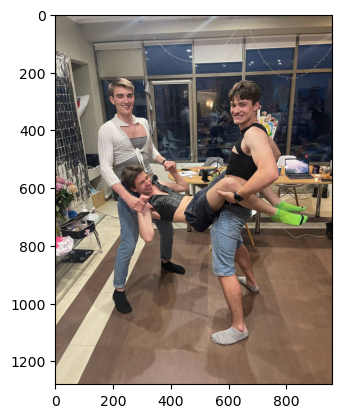

In [40]:
plt.imshow(image_raw)

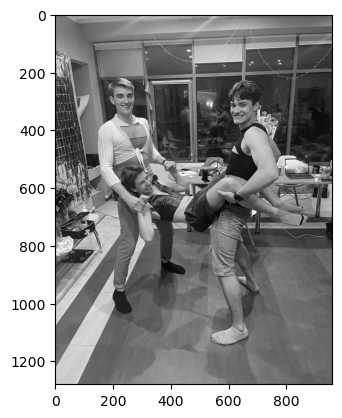

In [34]:
image_sum = image_raw.sum(axis=2)

image_bw = image_sum / image_sum.max()

plt.imshow(image_bw, cmap='gray')

Шукаємо кількість компонент, які зберігають 95% дисперсії

In [26]:


pca = PCA()

pca.fit(image_bw)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.where(cumulative_variance >= 0.95)[0][0] + 1


print(f"Number of components needed for 95% variance: {num_components}")
cumulative_variance

Number of components needed for 95% variance: 107


array([0.23475047, 0.34578105, 0.43167763, 0.49075848, 0.53940993,
       0.58278219, 0.61482179, 0.64597008, 0.67270076, 0.69562924,
       0.71268215, 0.7267335 , 0.74023942, 0.75147467, 0.76204305,
       0.77222053, 0.78129186, 0.79006654, 0.79753987, 0.80458071,
       0.81081109, 0.81661592, 0.82201477, 0.82713151, 0.83192737,
       0.83636988, 0.84060987, 0.84463205, 0.84844753, 0.85197766,
       0.85546256, 0.85869193, 0.86171815, 0.86467132, 0.86740215,
       0.87004091, 0.87256356, 0.87501449, 0.87733809, 0.87952458,
       0.88170555, 0.88381283, 0.88584842, 0.88783849, 0.88976634,
       0.89160568, 0.89337532, 0.89507103, 0.89675728, 0.89839429,
       0.89993317, 0.90144098, 0.90291564, 0.90437937, 0.90579777,
       0.90719046, 0.9085214 , 0.90984949, 0.91115975, 0.91242645,
       0.91366351, 0.91488142, 0.91605388, 0.91718772, 0.91830312,
       0.91938827, 0.92045283, 0.92151123, 0.92256048, 0.92357127,
       0.92454957, 0.92551145, 0.92645742, 0.92738427, 0.92830

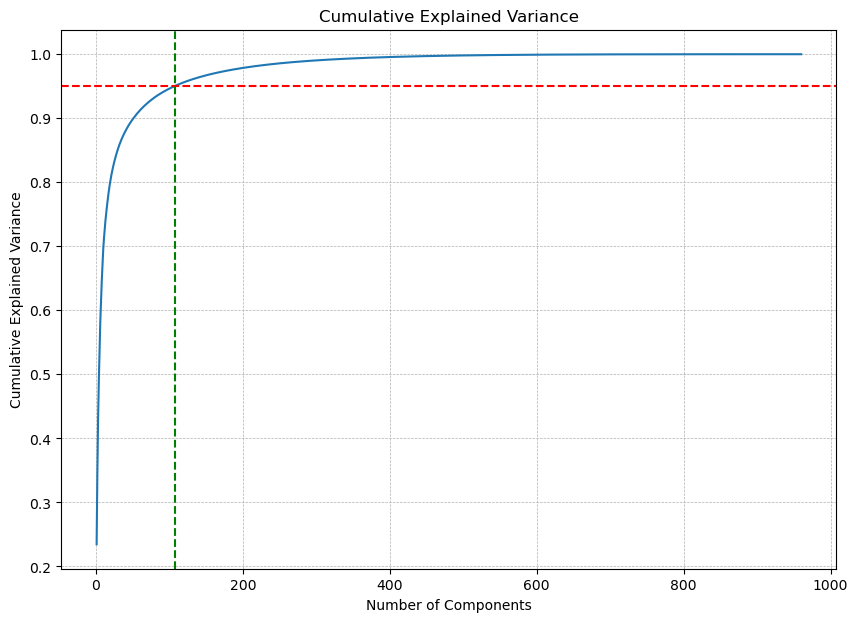

In [31]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=num_components, color='g', linestyle='--')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Реконструкція зображення за допомогою знайдених компонент

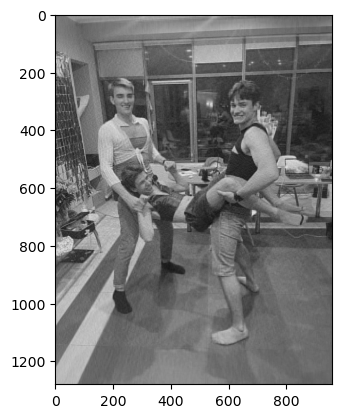

In [41]:
pca = PCA(n_components=num_components)

image_bw_pca = pca.fit_transform(image_bw)

image_reconstructed = pca.inverse_transform(image_bw_pca)

plt.imshow(image_reconstructed, cmap='gray')
plt.show()

Порівняння реконострукції з різною кількістю компонент

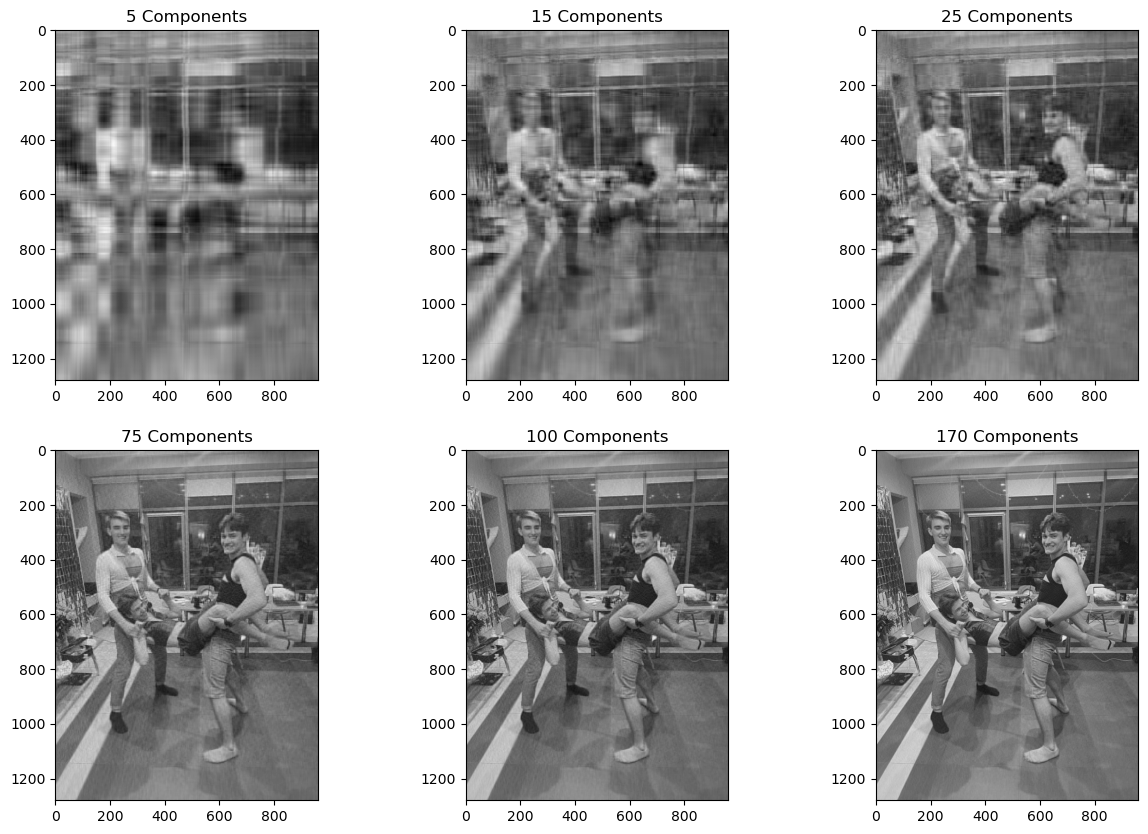

In [45]:
fig = plt.figure(figsize=(15, 10))
ax = fig.subplots(2, 3)

for i, n in enumerate([5, 15, 25, 75, 100, 170]):
    pca = PCA(n_components=n)
    image_bw_pca = pca.fit_transform(image_bw)
    image_reconstructed = pca.inverse_transform(image_bw_pca)
    
    ax[i//3, i%3].imshow(image_reconstructed, cmap='gray')
    ax[i//3, i%3].set_title(f'{n} Components')
    
plt.show()

Як бачимо, зображення з меншою кількістю компонент виглядають гірше, ніж з більшою кількістю компонент. Це пов'язано з тим, що чим більше компонент ми використовуємо, тим більше деталей ми можемо зберегти. Також після 75 компонент зображення вже майже не відрізняються від оригіналу.